In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

In [2]:
# Assign data files
events = "athlete_events.csv"
region = "noc_regions.csv"
# Read the data
events_data = pd.read_csv(events)
region_data = pd.read_csv(region)
#events_data.head()
#region_data.head()
#Combine the data into a single DataFrame
Olympics_df = pd.merge(events_data,region_data, how ="left", on ='NOC')
Olympics_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [3]:
olympics_fdf = Olympics_df[['ID', 'Name', 'Sex', 'Age','Height','Weight','Team','Games','Year','Season','City','Sport','Medal','region']]
olympics_fdf

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,NaN,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,1976 Winter,1976,Winter,Innsbruck,Luge,NaN,Poland
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,NaN,Poland
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,NaN,Poland
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,1998 Winter,1998,Winter,Nagano,Bobsleigh,NaN,Poland


In [4]:
olympics_age=olympics_fdf[olympics_fdf["Age"] !='N/A']
olympics_age.head()

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,NaN,Netherlands


In [7]:
# Drop rows with missing Age values
olympics_fdf_cleaned = olympics_fdf.dropna(subset=['Age'])

# Continue with the rest of the code for creating pie charts using olympics_fdf_cleaned


In [11]:
# Fill missing Age values with the mean age using .loc
mean_age = olympics_fdf['Age'].mean()
olympics_fdf.loc[olympics_fdf['Age'].isna(), 'Age'] = mean_age

# Continue with the rest of the code for creating pie charts using olympics_fdf



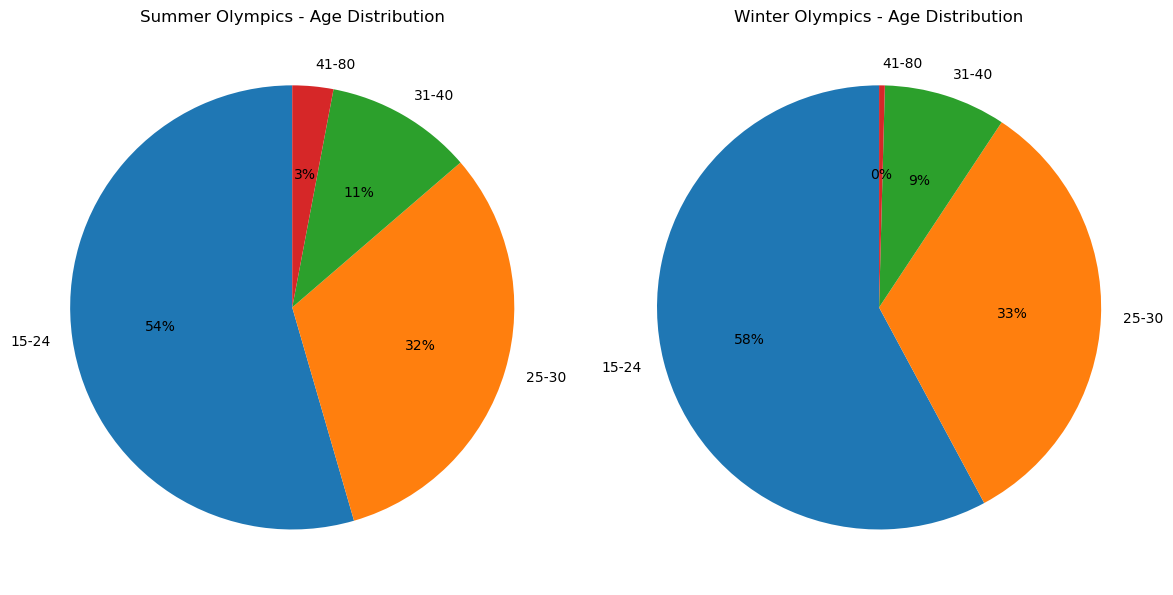

In [42]:

# Filter the data for summer and winter seasons
summer_data = olympics_fdf[olympics_fdf['Season'] == 'Summer'].copy()
winter_data = olympics_fdf[olympics_fdf['Season'] == 'Winter'].copy()

# Create age bins
age_bins = [15, 25, 31, 41, 80]  
age_labels = ['15-24', '25-30', '31-40', '41-80',]

# Apply the age bins  
summer_data.loc[:, 'Age Group'] = pd.cut(summer_data['Age'], bins=age_bins, labels=age_labels)
winter_data.loc[:, 'Age Group'] = pd.cut(winter_data['Age'], bins=age_bins, labels=age_labels)

summer_age_counts = summer_data['Age Group'].value_counts()
winter_age_counts = winter_data['Age Group'].value_counts()

# Plot pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(summer_age_counts, labels=summer_age_counts.index, autopct='%1.0f%%', startangle=90)
ax1.set_title('Summer Olympics - Age Distribution')

ax2.pie(winter_age_counts, labels=winter_age_counts.index, autopct='%1.0f%%', startangle=90)
ax2.set_title('Winter Olympics - Age Distribution')

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

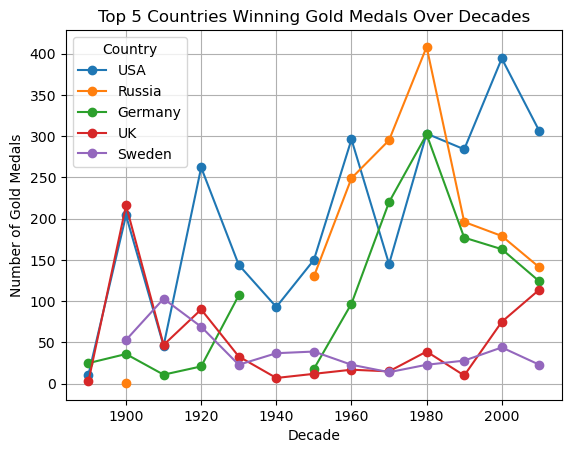

<Figure size 640x480 with 0 Axes>

In [34]:

# Filter data for gold medalists
gold_medals = olympics_fdf[olympics_fdf['Medal'] == 'Gold'].copy()

# Create a 'Decade' column without modifying the original DataFrame
gold_medals['Decade'] = (gold_medals['Year'] // 10) * 10

# Group data by country and decade
grouped = gold_medals.groupby(['Decade', 'region'])['Medal'].count().reset_index()

# Pivot the data to get countries as columns
pivot_df = grouped.pivot(index='Decade', columns='region', values='Medal')

# Get the top five countries for each decade
top_countries = pivot_df.idxmax(axis=1).value_counts().head(5).index

# Filter data for the top five countries
top_countries_data = pivot_df[top_countries]



# Plot line graph
plt.figure(figsize=(12, 8))
top_countries_data.plot(kind='line', marker='o')

plt.title('Top 5 Countries Winning Gold Medals Over Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Gold Medals')
plt.legend(title='Country', loc='upper left')

plt.grid(True)
plt.show()

plt.savefig("data/top_countries_data.png")
